In [3]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

In [4]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [5]:
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [6]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from pyexpat import model

In [7]:
Tayko_df = pd.read_csv('Tayko.csv')
Tayko_df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [8]:
#data types
Tayko_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [9]:
print(Tayko_df.head(20))

    sequence_number  US  source_a  source_c  source_b  source_d  source_e  \
0                 1   1         0         0         1         0         0   
1                 2   1         0         0         0         0         1   
2                 3   1         0         0         0         0         0   
3                 4   1         0         1         0         0         0   
4                 5   1         0         1         0         0         0   
5                 6   1         0         0         0         0         0   
6                 7   1         0         0         0         0         0   
7                 8   1         0         0         1         0         0   
8                 9   1         1         0         0         0         0   
9                10   1         1         0         0         0         0   
10               11   1         0         0         0         0         0   
11               12   1         0         0         0         0         0   

In [10]:
print(Tayko_df.shape)

(2000, 25)


In [11]:
new_df = Tayko_df[Tayko_df.Purchase != 0]
new_df = Tayko_df[Tayko_df['Purchase'] != 0]
new_df.shape

(1000, 25)

In [12]:
new_df.rename(columns={"Web order":"Web_order"})

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174
13,14,1,1,0,0,0,0,0,0,0,...,0,0,5,2081,2438,0,1,0,1,1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1992,1,0,0,0,0,0,0,0,0,...,0,0,1,2807,2807,0,1,0,1,55
1992,1993,1,0,0,0,0,0,0,1,0,...,0,0,2,2466,3747,0,1,0,1,133
1994,1995,1,0,0,0,0,1,0,0,0,...,0,0,2,1136,1400,0,1,0,1,184
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,30


In [13]:
new_df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

Text(0, 0.5, 'Spending')

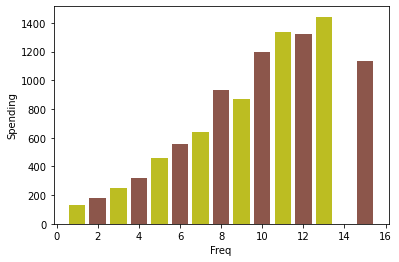

In [14]:
dataForPlot = new_df.groupby('Freq').mean().Spending
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C8', 'C15'])
ax.set_xlabel('Freq')
ax.set_ylabel('Spending')


Text(0.5, 1.0, '')

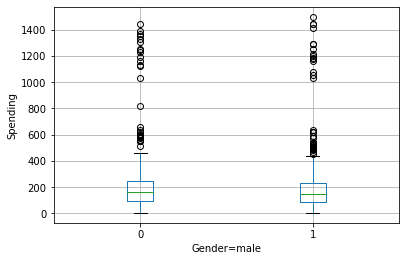

In [15]:
ax = new_df.boxplot(column='Spending', by='Gender=male')
ax.set_ylabel('Spending')
plt.suptitle('') # Suppress the titles
plt.title('')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0, 0.5, 'Spending')

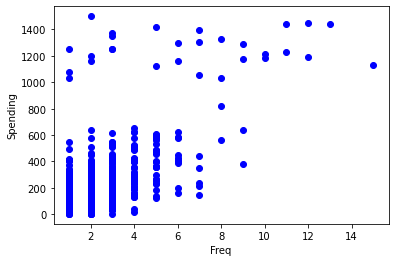

In [18]:
plt.scatter(new_df.Freq, new_df.Spending, color='Blue')
plt.xlabel('Freq'); plt.ylabel('Spending')

<Figure size 432x288 with 0 Axes>

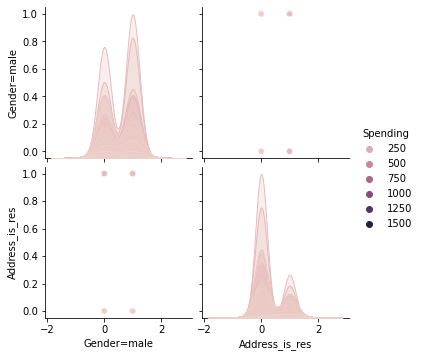

In [31]:
plt.figure()
cols_to_plot = new_df.columns[21:23].tolist() + ['Spending'] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(new_df[cols_to_plot], hue ="Spending")
plt.show()


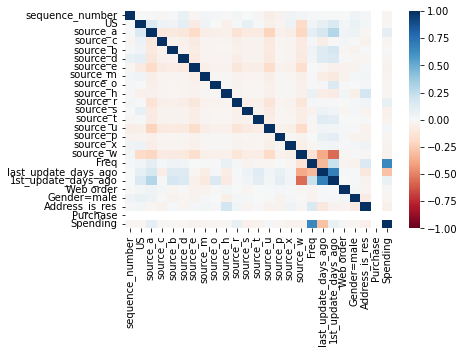

In [60]:
corr = new_df.corr()
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
fig.set_size_inches(110000, 70000)

In [33]:
new_df.corr().round(2)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
sequence_number,1.00,0.01,-0.00,-0.02,0.01,0.07,-0.02,0.03,0.02,-0.00,...,0.04,0.03,0.02,0.01,0.00,0.01,0.04,0.02,NaN,-0.02
US,0.01,1.00,0.14,0.06,0.04,0.10,-0.08,0.04,0.00,-0.05,...,0.06,-0.20,0.04,0.09,0.15,0.03,0.06,0.03,NaN,-0.02
source_a,-0.00,0.14,1.00,-0.11,-0.10,-0.11,-0.19,-0.07,-0.06,-0.05,...,-0.07,-0.21,0.09,0.17,0.29,0.04,0.05,-0.02,NaN,0.10
source_c,-0.02,0.06,-0.11,1.00,-0.04,-0.05,-0.08,-0.03,-0.02,-0.02,...,-0.03,-0.09,0.02,-0.07,-0.01,0.03,-0.01,-0.03,NaN,-0.02
source_b,0.01,0.04,-0.10,-0.04,1.00,-0.04,-0.08,-0.03,-0.02,-0.02,...,-0.03,-0.08,0.04,0.13,0.17,-0.02,-0.04,0.01,NaN,-0.01
source_d,0.07,0.10,-0.11,-0.05,-0.04,1.00,-0.09,-0.03,-0.03,-0.02,...,-0.03,-0.09,0.03,0.13,0.14,-0.01,-0.02,-0.02,NaN,-0.02
source_e,-0.02,-0.08,-0.19,-0.08,-0.08,-0.09,1.00,-0.05,-0.05,-0.04,...,-0.05,-0.17,0.00,-0.02,-0.05,-0.04,-0.03,0.02,NaN,-0.04
source_m,0.03,0.04,-0.07,-0.03,-0.03,-0.03,-0.05,1.00,-0.02,-0.02,...,-0.02,-0.06,-0.00,-0.07,-0.10,-0.03,0.02,0.03,NaN,-0.03
source_o,0.02,0.00,-0.06,-0.02,-0.02,-0.03,-0.05,-0.02,1.00,-0.01,...,-0.02,-0.05,-0.01,0.02,0.14,-0.00,0.01,0.02,NaN,-0.02
source_h,-0.00,-0.05,-0.05,-0.02,-0.02,-0.02,-0.04,-0.02,-0.01,1.00,...,-0.01,-0.05,0.06,-0.07,-0.08,0.03,-0.06,0.18,NaN,-0.01


In [42]:
# select columns for regression analysis

predictors = ['US', 'Freq', 'Web order', 'Gender=male', 'Address_is_res']
outcome = 'Spending'

In [43]:
predictors

['US', 'Freq', 'Web order', 'Gender=male', 'Address_is_res']

In [44]:
outcome

'Spending'

In [45]:
# dummy variable creation
X = pd.get_dummies(new_df[predictors], drop_first=True)
y = new_df[outcome]

In [46]:
X

,US,Freq,Web order,Gender=male,Address_is_res
0,1,2,1,0,1
2,1,2,0,0,0
8,1,4,1,1,0
9,1,1,0,0,0
13,1,5,0,1,0
...,...,...,...,...,...
1991,1,1,0,1,0
1992,1,2,0,1,0
1994,1,2,0,1,0
1995,1,1,1,0,0


In [47]:
y

0        128
2        127
8        489
9        174
13      1416
        ... 
1991      55
1992     133
1994     184
1995      30
1996      10
Name: Spending, Length: 1000, dtype: int64

In [49]:
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [50]:
train_X

,US,Freq,Web order,Gender=male,Address_is_res
677,1,1,0,1,1
89,1,1,1,0,0
1059,0,5,1,0,0
1478,1,4,0,1,0
776,0,2,1,0,0
...,...,...,...,...,...
1522,1,1,0,1,0
139,1,3,1,1,1
1808,1,2,1,0,0
404,1,2,0,1,1


In [51]:
train_X.describe()

,US,Freq,Web order,Gender=male,Address_is_res
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.833333,2.035000,0.558333,0.530000,0.220000
std,0.372989,1.510268,0.497000,0.499516,0.414592
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000


In [52]:
valid_X

,US,Freq,Web order,Gender=male,Address_is_res
963,1,3,1,0,0
1599,1,4,1,0,0
850,1,4,1,1,0
667,1,1,0,1,0
422,1,1,0,1,0
...,...,...,...,...,...
298,1,1,1,0,0
1047,0,1,1,1,0
192,1,2,0,1,0
1495,1,3,0,0,0


In [53]:
valid_X.describe()

,US,Freq,Web order,Gender=male,Address_is_res
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.832500,2.140000,0.522500,0.490000,0.227500
std,0.373889,1.722736,0.500119,0.500526,0.419743
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000
max,1.000000,15.000000,1.000000,1.000000,1.000000


In [54]:
train_y

677     203
89      277
1059    262
1478    422
776      71
       ... 
1522    130
139     141
1808    345
404      83
77       50
Name: Spending, Length: 600, dtype: int64

In [55]:
train_y.describe()

count     600.000000
mean      201.878333
std       210.219498
min         3.000000
25%        97.000000
50%       153.000000
75%       237.750000
max      1500.000000
Name: Spending, dtype: float64

In [56]:
valid_y.describe()

count     400.000000
mean      210.305000
std       235.821153
min         3.000000
25%        85.000000
50%       153.000000
75%       230.000000
max      1446.000000
Name: Spending, dtype: float64

In [62]:
#fit regression model
new_lm = LinearRegression()
new_lm.fit(X,y)

LinearRegression()

In [64]:
# print coefficients
print('intercept ', new_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': new_lm.coef_}))

# print performance measures
regressionSummary(train_y, new_lm.predict(train_X))

intercept  49.37985708732637
        Predictor  coefficient
0              US   -20.202817
1            Freq    92.482681
2       Web order    -0.578635
3     Gender=male    -1.712385
4  Address_is_res   -81.585186

Regression statistics

                      Mean Error (ME) : 0.3113
       Root Mean Squared Error (RMSE) : 161.8108
            Mean Absolute Error (MAE) : 101.4600
          Mean Percentage Error (MPE) : -106.5693
Mean Absolute Percentage Error (MAPE) : 136.3888


In [65]:
pred_y = new_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, new_lm))
print('AIC : ', AIC_score(train_y, pred_y, new_lm))
print('BIC : ', BIC_score(train_y, pred_y, new_lm))

adjusted r2 :  0.4015417711526922
AIC :  7820.439563653923
BIC :  7851.218071240436


In [66]:
pred_y

array([  38.36215076,  121.08108629,  511.21462862,  397.39538109,
        233.76658444,  304.33406425,  489.87806248,  121.08108629,
         40.07453559, 1138.39058164,  141.86253848,  132.55721699,
        121.65972174,  232.0541996 ,  214.14240313,  121.65972174,
        306.04644908,  211.85138286,  211.85138286,  121.65972174,
        121.65972174,  232.0541996 ,  214.14240313,  119.36870146,
        141.86253848,   37.78351532,  121.08108629,  500.77555773,
        304.33406425,  214.14240313,  224.46126294,  131.97858154,
        119.36870146,  119.9473369 ,  233.76658444,  119.9473369 ,
        213.56376769,  119.36870146,  141.86253848,  326.82790127,
         38.36215076,  139.57151821,  119.9473369 ,  326.24926583,
        325.11551644,  317.52257978,  121.08108629,   40.07453559,
        304.91269969,  232.0541996 ,  232.0541996 ,  119.9473369 ,
        119.9473369 ,   58.56496751,  119.36870146,  214.14240313,
        119.36870146,   37.78351532,  407.7142409 ,  214.14240

In [67]:
# Use predict() to make predictions on a new set
new_lm_pred = new_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': new_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - new_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, new_lm_pred)

       Predicted  Actual    Residual
963   306.046449     104 -202.046449
1599  398.529130     655  256.470870
850   396.816746     253 -143.816746
667   119.947337      98  -21.947337
422   119.947337      83  -36.947337
1854  212.430018      42 -170.430018
453   121.081086     135   13.918914
1587  211.851383      69 -142.851383
570   232.054200     153  -79.054200
104   119.947337     164   44.052663
836   397.395381     232 -165.395381
252   121.659722     141   19.340278
1948  119.368701      91  -28.368701
620   141.862538      57  -84.862538
1953  213.563768     248   34.436232
237   119.947337     130   10.052663
193   121.659722      80  -41.659722
18    130.266197     130   -0.266197
1156   39.495900     306  266.504100
945   121.659722     136   14.340278

Regression statistics

                      Mean Error (ME) : -0.4669
       Root Mean Squared Error (RMSE) : 169.8733
            Mean Absolute Error (MAE) : 105.3047
          Mean Percentage Error (MPE) : -88.3131
Mean

In [68]:
#Correlation
# Create a new dataframe with predictors
predictors_df = X
predictors_df.columns

Index(['US', 'Freq', 'Web order', 'Gender=male', 'Address_is_res'], dtype='object')

In [69]:
import numpy as np
import seaborn as sns
corr = predictors_df.corr()
corr

,US,Freq,Web order,Gender=male,Address_is_res
US,1.000000,0.035001,0.026098,0.063504,0.027316
Freq,0.035001,1.000000,-0.024991,-0.040794,0.156108
Web order,0.026098,-0.024991,1.000000,0.029663,-0.030445
Gender=male,0.063504,-0.040794,0.029663,1.000000,-0.079895
Address_is_res,0.027316,0.156108,-0.030445,-0.079895,1.000000


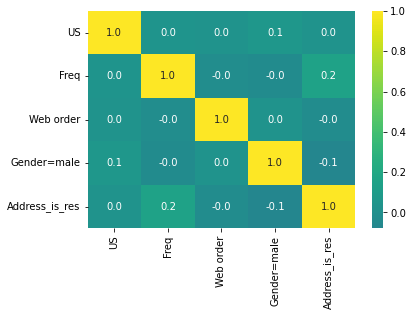

In [72]:
#heatmap using seaborn 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".1f", cmap="viridis", center=0, ax=ax)
plt.savefig("mycorr.png")

In [80]:
new2_df = pd.DataFrame(
    [[1,2,1,0,1]],
    columns=['US','Freq','Web order','Gender=male','Address_is_res'])
new2_df

,US,Freq,Web order,Gender=male,Address_is_res
0,1,2,1,0,1


In [82]:
new_lm_pred  = new_lm.predict(new2_df)
print('Predicted spending for with the filtered dataset:', new_lm_pred)

Predicted spending for with the filtered dataset: [131.97858154]


In [83]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj          AIC  Address_is_res  Freq  Gender=male     US  Web order
0  1  0.382874  7834.896400           False  True        False  False      False
1  2  0.404448  7814.541140            True  True        False  False      False
2  3  0.404204  7815.780872            True  True        False   True      False
3  4  0.403476  7817.506829            True  True         True   True      False
4  5  0.402618  7819.359975            True  True         True   True       True


In [87]:
## Stepwise

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, Web order, Gender=male, Address_is_res
Start: score=7819.36
Step: score=7817.51, remove Web order
Step: score=7815.78, remove Gender=male
Step: score=7814.54, remove US
Step: score=7814.54, remove None
['Freq', 'Address_is_res']


In [91]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

In [92]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, Web order, Gender=male, Address_is_res
Start: score=8123.51, constant
Step: score=7834.90, add Freq
Step: score=7814.54, add Address_is_res
Step: score=7814.54, unchanged None
['Freq', 'Address_is_res']


In [95]:
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(new_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation':
np.sqrt(pcs.explained_variance_), 'Proportion of variance':
pcs.explained_variance_ratio_,'Cumulative proportion':
np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1,
len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Standard deviation,1397.0234,613.8995,192.7077,0.9933,0.5078,0.4922,0.3999,0.3921,0.3586,0.2888,...,0.1953,0.1837,0.1733,0.1505,0.1324,0.1203,0.1094,0.1036,0.0896,0.0
Proportion of variance,0.8250,0.1593,0.0157,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Cumulative proportion,0.8250,0.9843,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0


In [96]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
index=new_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
source_c,0.000006,2.270323e-05,-0.000074,-0.003471,-0.009822,-0.013484,0.012800,-0.037629,-0.015151,0.128846,...,0.679303,0.119606,-0.135392,-0.202369,-0.055542,-0.127708,0.039855,-0.014947,0.175822,-0.0
source_b,-0.000022,1.776970e-05,-0.000012,0.007010,0.016145,-0.004695,-0.015013,-0.028165,-0.053123,-0.003762,...,-0.480378,0.765158,-0.124778,-0.295416,-0.022311,-0.109281,0.049224,0.013213,0.163997,-0.0
source_d,-0.000022,6.200192e-06,-0.000007,0.012898,0.006022,-0.003209,-0.001307,-0.046445,-0.061289,0.039171,...,0.224631,0.150360,-0.072728,-0.214066,-0.029703,-0.108076,0.036176,0.003355,0.158927,-0.0
source_e,0.000008,-2.162646e-05,-0.000046,0.022588,0.060969,0.013582,-0.179940,-0.295661,0.799494,-0.317046,...,0.119924,0.036644,-0.054289,-0.123105,-0.041559,-0.102924,0.022004,-0.021656,0.157377,-0.0
source_m,0.000009,-7.946081e-06,-0.000022,0.005866,0.001251,0.011307,-0.008526,0.002580,0.003800,0.056304,...,-0.117172,-0.019461,0.093419,0.499250,-0.651253,-0.449492,0.034795,-0.091994,0.280465,-0.0
source_o,-0.000007,2.746227e-05,-0.000055,-0.013384,0.002777,-0.000222,-0.015464,-0.005773,-0.017526,-0.010287,...,-0.011948,-0.030478,0.014121,0.122844,-0.009309,0.374505,0.846402,0.181190,0.305219,-0.0
source_h,0.000006,-3.263106e-06,-0.000010,0.014317,0.006744,-0.015025,-0.037579,0.021650,-0.002346,0.025156,...,-0.048249,-0.015711,0.028864,0.094874,0.093929,0.450390,-0.272256,-0.635959,0.539763,-0.0
source_r,-0.000001,-3.766162e-06,0.000130,-0.002966,-0.013375,0.006126,-0.094692,-0.022259,-0.055121,0.698399,...,0.159924,0.052165,-0.063968,-0.145231,-0.040446,-0.108051,0.025447,-0.019869,0.158136,-0.0
source_s,-0.000007,-8.493206e-06,-0.000029,-0.001542,-0.001953,0.010279,0.000208,-0.022931,-0.018938,0.053421,...,-0.355749,-0.556152,-0.579572,-0.366458,-0.063323,-0.159127,0.042295,-0.008854,0.185880,-0.0
source_t,-0.000015,-2.852672e-06,-0.000012,0.002871,-0.001220,-0.000107,-0.009519,-0.020300,-0.029885,0.015764,...,-0.134322,-0.243685,0.772395,-0.503112,-0.045140,-0.151394,0.048145,0.004334,0.182574,-0.0
